## Runlu QU 
## Valentin PORTILLO

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing

In [2]:
INPUT = './data/'

In [3]:
ruspini_df = pd.read_csv(INPUT + 'ruspini.csv', index_col=0)
food_df = pd.read_csv(INPUT + 'food.csv', index_col=0, sep=';')

### Question 1.1

> We have a two lists of coordinates (x, y), with 75 individuals.

> As we can see from the boxplot and the description, 

>> For x, most part of points are concentrated around 31.5 and 76.5, the maximum is 117 and the minimum is 4, and the median is 52, and the mean is 54.88

>> For y, most part of points are concentrated around 56.5 and 141.5, the maximum is 156 and the minimum is 4, and the median is 96, and the mean is 92.03. Besides, "y" has more variability (standard deviation is bigger).

In [4]:
ruspini_df.describe()

,x,y
count,75.00000,75.000000
mean,54.88000,92.026667
std,30.50253,48.702620
min,4.00000,4.000000
25%,31.50000,56.500000
50%,52.00000,96.000000
75%,76.50000,141.500000
max,117.00000,156.000000


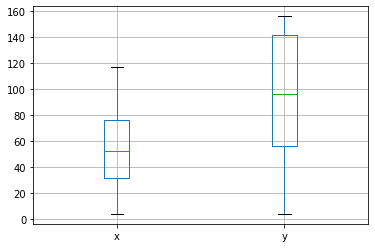

In [5]:
ruspini_df.boxplot()

### Question 1.2

> We have five lists conatining nutrient levels

> As we can see from the boxplot and the description, 

>> Energy, is the one that is more variable, so that every food could has a very different value

>> Protein, has very concentrated values, it has an outlier (7).

>> Fat, has very concentrated values, no outliers.

>> Calcium, has very concentrated values, several outliers

>> Iron, is the one that has the most concentrated values,with one outlier


In [6]:
food_df.describe()

,Energy,Protein,Fat,Calcium,Iron
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,207.407407,19.000000,13.481481,43.962963,2.381481
std,101.207806,4.251696,11.257033,78.034254,1.461305
min,45.000000,7.000000,1.000000,5.000000,0.500000
25%,135.000000,16.500000,5.000000,9.000000,1.350000
50%,180.000000,19.000000,9.000000,9.000000,2.500000
75%,282.500000,22.000000,22.500000,31.500000,2.600000
max,420.000000,26.000000,39.000000,367.000000,6.000000


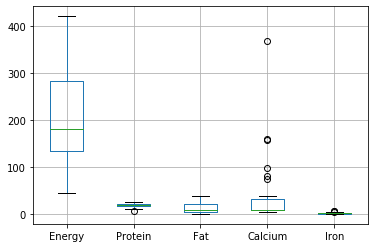

In [7]:
food_df.boxplot()

### Question 2

> We can say that there's a visible division. We would divide it into 4 partitions.

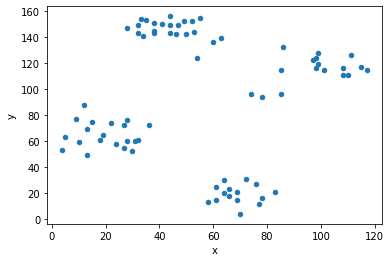

In [8]:
ruspini_df.plot.scatter(x='x', y='y')

### Question 3

> We can see that for a small amount of clusters (<6) KMeans is robust since it delivers the same results after more than 10 repetitions, but, for 6 clusters, we start to see that the number of repetitions affect since the centers move and thus the resulting partitions are not reliable

In [9]:
rusini_X = ruspini_df.to_numpy()

In [10]:
def runKmeans(X, n_clusters, plot=True, random_state=None):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state).fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    if plot:
        plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
        plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    return silhouette_score(X, labels=kmeans.labels_)

0.5827264208152947

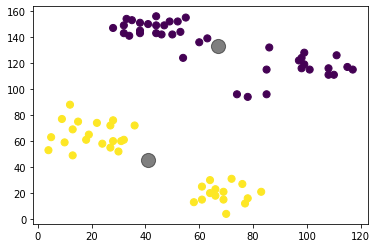

In [11]:
runKmeans(rusini_X, 2)

0.6327047140348644

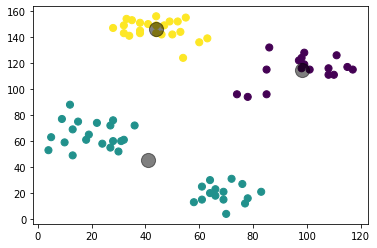

In [12]:
runKmeans(rusini_X, 3)

0.7376569908806615

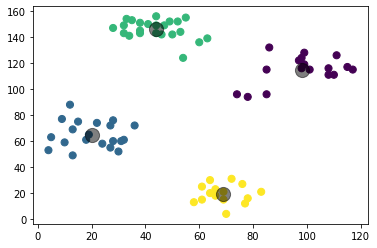

In [13]:
runKmeans(rusini_X, 4)

0.7019241413569157

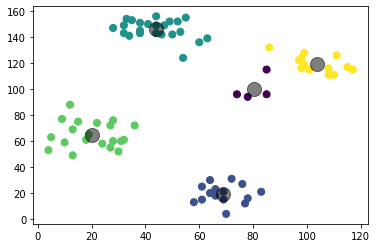

In [14]:
runKmeans(rusini_X, 5)

0.5939992676136585

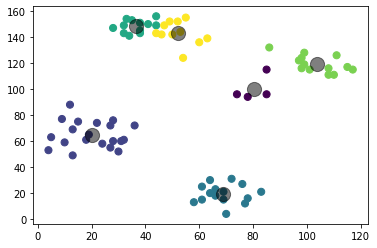

In [15]:
runKmeans(rusini_X, 6)

### Question 4

> By initializing the random state, let this part to be deterministic and thus expect same result each time, and the centers are initialized in the same spot each iteration

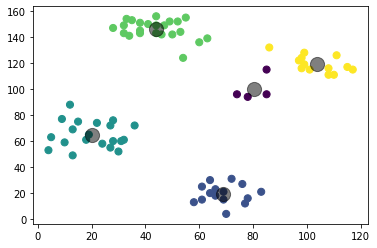

In [16]:
X = rusini_X
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [68]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

### Question 5

> So we see that the silhouette score shows us a increasing value that descreses after 5 components whiche make us think that thte best number of clusters is 4

In [17]:
labels = kmeans.labels_

In [18]:
silhouette_score(X, labels)

0.7019241413569157

In [19]:
scores = np.array([])
n = np.array([])

In [20]:
for i in range(2, 11):
    scores = np.append(scores, runKmeans(X, i, False, 0)) #= runKmeans(X, i, False, 0)
    n = np.append(n, i)

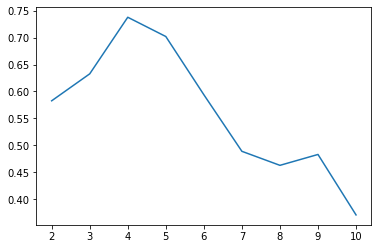

In [21]:
sns.lineplot(x=n, y=scores)

### Question 6

> Here, we tryied the method PAM but still it wasn't robust without tunning, so maybe the R package has a different implementation as the one we're using

In [40]:
from KMedoids import KMedoids

In [128]:
def runKMedoids(X, n, plot=True):
    kmedoids = KMedoids(n_cluster=n)
    fitted = kmedoids.fit(X.tolist())
    clusters = fitted.clusters
    array = np.zeros((len(X)), dtype=np.int32)
    group = 0
    for k in clusters:
        indexes = clusters[k]
        for i in range(len(indexes)):
            array[indexes[i]] = group
        group += 1
    plt.scatter(X[:, 0], X[:, 1], c=array, s=50, cmap='viridis')

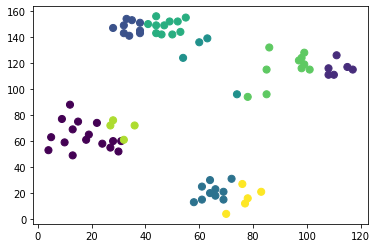

In [140]:
runKMedoids(X,9)

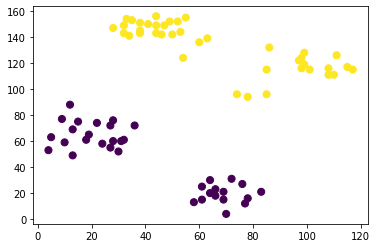

In [130]:
runKMedoids(X, 2)

### Question 7

> We tried to visualize the data but it turned to be difficult since we have 5 dimensions and just with a visual inspection to the initial plots we don't see any clear partitioning. So, we calculated directly the silhouette score and obtained that the best number of clusters was 3

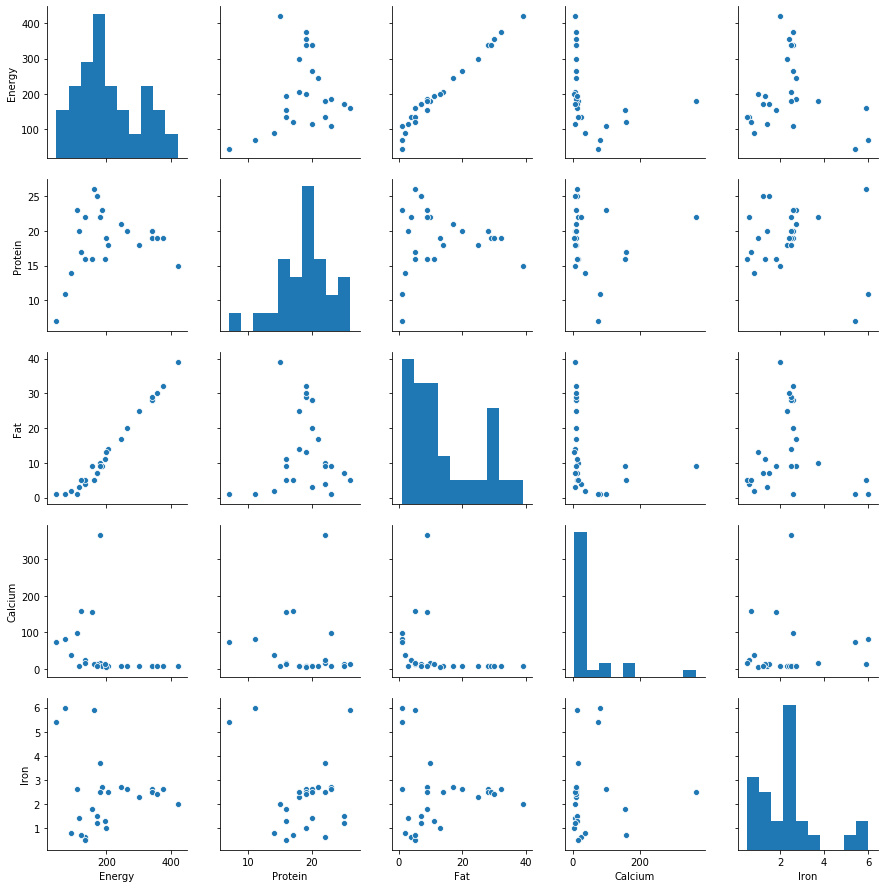

In [25]:
sns.pairplot(food_df)

In [26]:
food_X = food_df.to_numpy()

In [27]:
X = food_X
scores = np.array([])
n = np.array([])
for i in range(2, 11):
    scores = np.append(scores, runKmeans(X, i, False, 0)) #= runKmeans(X, i, False, 0)
    n = np.append(n, i)

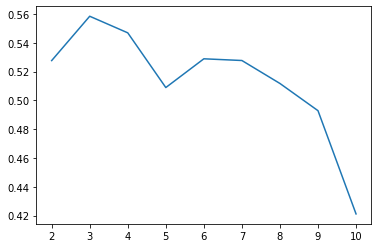

In [28]:
sns.lineplot(x=n, y=scores)

### Question 8

> From the cofiguration proposed (euclidean distance, 'complete' method) we obtain that if we respect the 3 clusters calculated before, we would obtain a separation between pork and beef meat as a first group, clams as a second, and seafood, chicken and two beef meats (of 15 elements in the group) as a third.

In [29]:
food_scaled = preprocessing.scale(food_X)

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

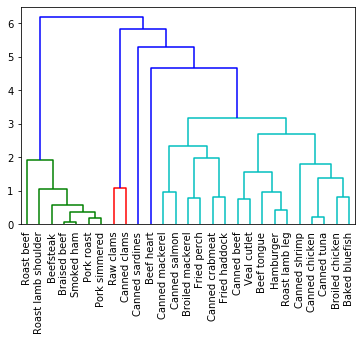

In [31]:
#hierarchical =AgglomerativeClustering(n_clusters=3).fit_predict(food_scaled)
Z = linkage(food_scaled, 'complete', metric='euclidean')
plt.figure()
dn = dendrogram(Z, labels=food_df.index, leaf_rotation=90)

### Question 9.1

> Since we know that Jaccard method fit for binary values, and Hamming has a similar result both would work for that type of data, but in our case, it results confusing since the dendrogram is not readable.

> Same thing for dice method, there are just 2 groups, the method is used for abondance in nature of species.

> But for example, the cosine method seems to work also good because is "groupable" and it seems to have a better distinction in distances than the euclidean method for our dataset by showing very low values for similar "meals" difrentiable distances between possible groups. Though, the 'ward' method cannot be used with this metric. 

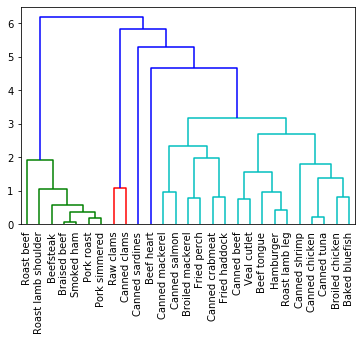

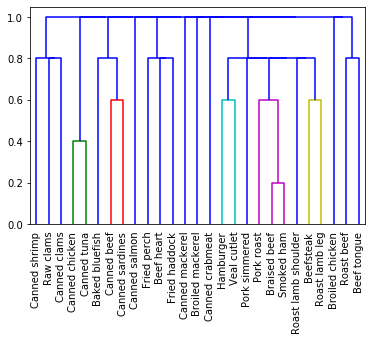

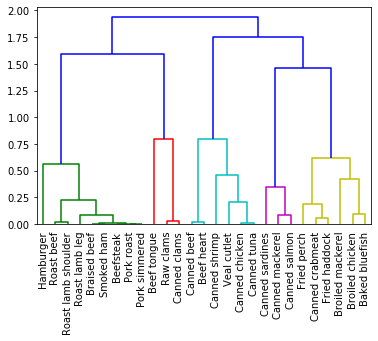

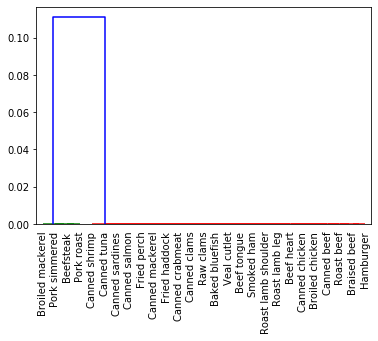

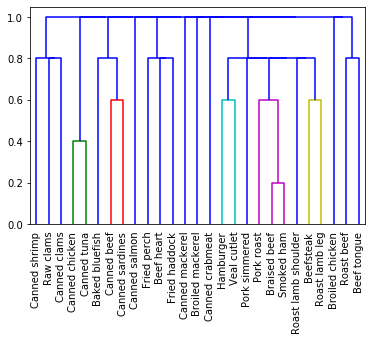

In [33]:
"""‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule"""
distances = ['euclidean', 'jaccard', 'cosine', 'dice', 'hamming']
for i, dist in enumerate(distances):
    plt.figure()
    dn = dendrogram( linkage(food_scaled, 'complete', metric=dist), labels=food_df.index, leaf_rotation=90)

### Question 9.2

> based on the differet method to count the distance,the hierarechy clustering returns different results:

>>for 'complete' and 'weighted',the result is similar;

>>'centroid' and 'average' return the same result.

>The shape of the dendrograms are different; if we read the detail, some individuals are still in the same group even the method changes. 

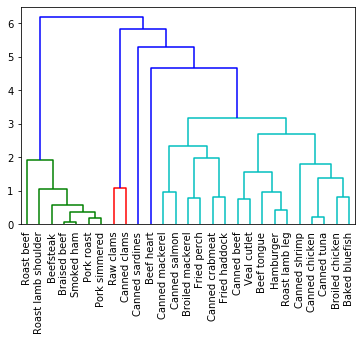

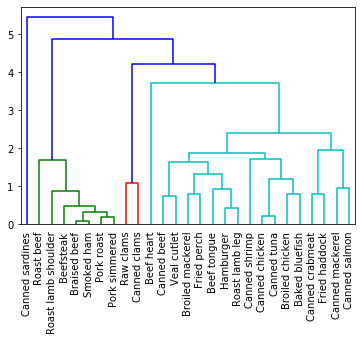

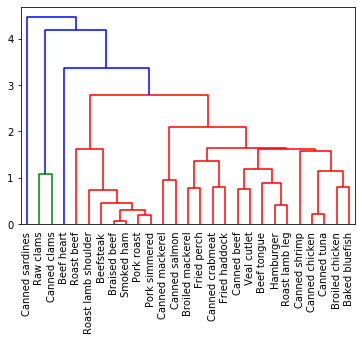

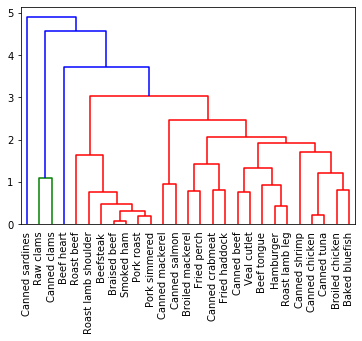

In [37]:
criteria = ['complete', 'weighted', 'centroid', 'average']
for i, crit in enumerate(criteria):
    plt.figure()
    dn = dendrogram( linkage(food_scaled, crit, metric='euclidean'), labels=food_df.index, leaf_rotation=90)

### Question 10
Finally, we chosed 'euclidean' distance with 'ward' method, the result showing below:

>As we cut the dendrogram where the number of clusters is 4, we have 4 groups here. We add the 'class' variable to the food dataframe, which represents to which cluster each individual belongs.

>>The first group, which the label is '0' in the 'class' variable, all the most energetic food is inside this class.
This food contains a lot of fat (the mean of fat is 30.14, higest), less calcium (the mean of calcium is 8.7, the lowest), a lot of protein(18.57). And, based on the name of each individual, we know that in this cluster there is a lot of meat,like porc,beef,etc.

>>The second group,with label '1' in the 'class' variable, these food has a lot of energy(166.76), a lot of calcium(35.47), plenty of protein(20.17), but not too much fat or Iron. like chichen and Canned crabmeat.

>>The third group, the calcium is 78 (quite high), the mean of energy is 57.5, lowest fat proportion(only 1.0),highest iron proportion(5.7). The food inside this group is clams.

>>The fourth group, which contains only one individual, it contains highest calcium(367) and highest protein(22).  

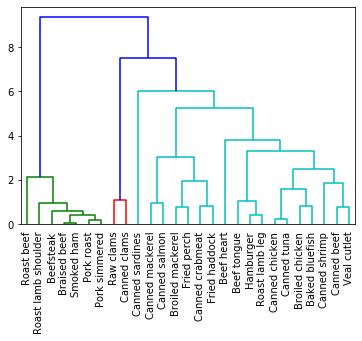

In [83]:
Z = linkage(food_scaled, 'ward', metric='euclidean')
plt.figure()
dn = dendrogram(Z, labels=food_df.index, leaf_rotation=90)

In [41]:
ct = cut_tree(Z, 4)

In [51]:
food_df['class']=ct

In [66]:
food_df

,Energy,Protein,Fat,Calcium,Iron,class
Name,,,,,,
Braised beef,340,20,28,9,2.6,0
Hamburger,245,21,17,9,2.7,1
Roast beef,420,15,39,7,2.0,0
Beefsteak,375,19,32,9,2.6,0
Canned beef,180,22,10,17,3.7,1
Broiled chicken,115,20,3,8,1.4,1
Canned chicken,170,25,7,12,1.5,1
Beef heart,160,26,5,14,5.9,1
Roast lamb leg,265,20,20,9,2.6,1


In [80]:
bygroup = food_df.pivot_table(columns='class', aggfunc='mean')

In [81]:
bygroup

class,0,1,2,3
Calcium,8.714286,35.470588,78.0,367.0
Energy,352.857143,166.764706,57.5,180.0
Fat,30.142857,8.352941,1.0,9.0
Iron,2.414286,1.970588,5.7,2.5
Protein,18.571429,20.176471,9.0,22.0


In [82]:
bygroup.describe()

class,0,1,2,3
count,5.000000,5.000000,5.000000,5.000000
mean,82.540000,46.547059,30.240000,116.100000
std,151.475380,68.403639,35.115709,158.322614
min,2.414286,1.970588,1.000000,2.500000
25%,8.714286,8.352941,5.700000,9.000000
50%,18.571429,20.176471,9.000000,22.000000
75%,30.142857,35.470588,57.500000,180.000000
max,352.857143,166.764706,78.000000,367.000000
